In [ ]:
NPXpp_BaseD1significant
NPXpp_D30Base_significant

In [1]:
import pandas as pd

# Read your two CSVs
df1 = pd.read_csv("NPXpp_BaseD1significant.csv")
df2 = pd.read_csv("NPXpp_D30Base_significant.csv")

# Define thresholds
thresholds = [0.05, 0.01, 0.001]

# Function to count below thresholds
def count_pvalues(df, name):
    counts = {}
    for t in thresholds:
        counts[f"p<{t}"] = (df['p_value'] < t).sum()
    return pd.Series(counts, name=name)

# Count for each file
summary = pd.concat([
    count_pvalues(df1, "File1"),
    count_pvalues(df2, "File2")
], axis=1)

print(summary)


         File1  File2
p<0.05     388    129
p<0.01     267     38
p<0.001    139      7


In [2]:


# Compute overlaps
overlaps = {}
for t in thresholds:
    sig1 = set(df1.loc[df1['p_value'] < t, 'Protein'])
    sig2 = set(df2.loc[df2['p_value'] < t, 'Protein'])
    overlap = sig1 & sig2
    overlaps[f"p<{t}"] = len(overlap)

# Display
overlap_df = pd.DataFrame.from_dict(overlaps, orient='index', columns=['Overlap_Count'])
print(overlap_df)


         Overlap_Count
p<0.05              77
p<0.01              17
p<0.001              1


In [6]:
#check top 5 
top5df1 = df1.nsmallest(5, 'p_value')
print(top5df1)
top5df2 = df2.nsmallest(5, 'p_value')
print(top5df2)

  Protein  mean_diff       p_value
0    IL32   -0.55388  6.069893e-07
1   FCRL6   -0.41725  1.391245e-06
2  LEFTY2   -1.06346  2.148095e-06
3   CCL23    1.42141  2.862700e-06
4    DKK4   -1.12409  2.942474e-06
   Protein  mean_diff   p_value
0   ADAM12   1.222422  0.000309
1  COL24A1   0.962000  0.000318
2    GFRA1   0.423544  0.000755
3   EIF4E2  -0.319467  0.000771
4  TNFSF13   0.260033  0.000781


In [ ]:
1 - IL32
FCRL6
LEFTY2
CCL23
2- ADAM12, COL24A1,GFRA1, EIF4E2, TNFSF13


NPXpp_with_timecode

In [ ]:
read NPXpp_with_timecode.csv (SampleID,Timepoint , then all are protiens column) then 1 - IL32
FCRL6
LEFTY2
CCL23 check this protines from column and make a same plot in a single figures  i need like this import pandas as pd




C:\Users\mondalsy\AppData\Local\Temp\ipykernel_33656\1422839258.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, fontsize=12)
C:\Users\mondalsy\AppData\Local\Temp\ipykernel_33656\1422839258.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, fontsize=12)
C:\Users\mondalsy\AppData\Local\Temp\ipykernel_33656\1422839258.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, fontsize=12)
C:\Users\mondalsy\AppData\Local\Temp\ipykernel_33656\1422839258.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, fontsize=12)
C:\Users\mondalsy\Ap

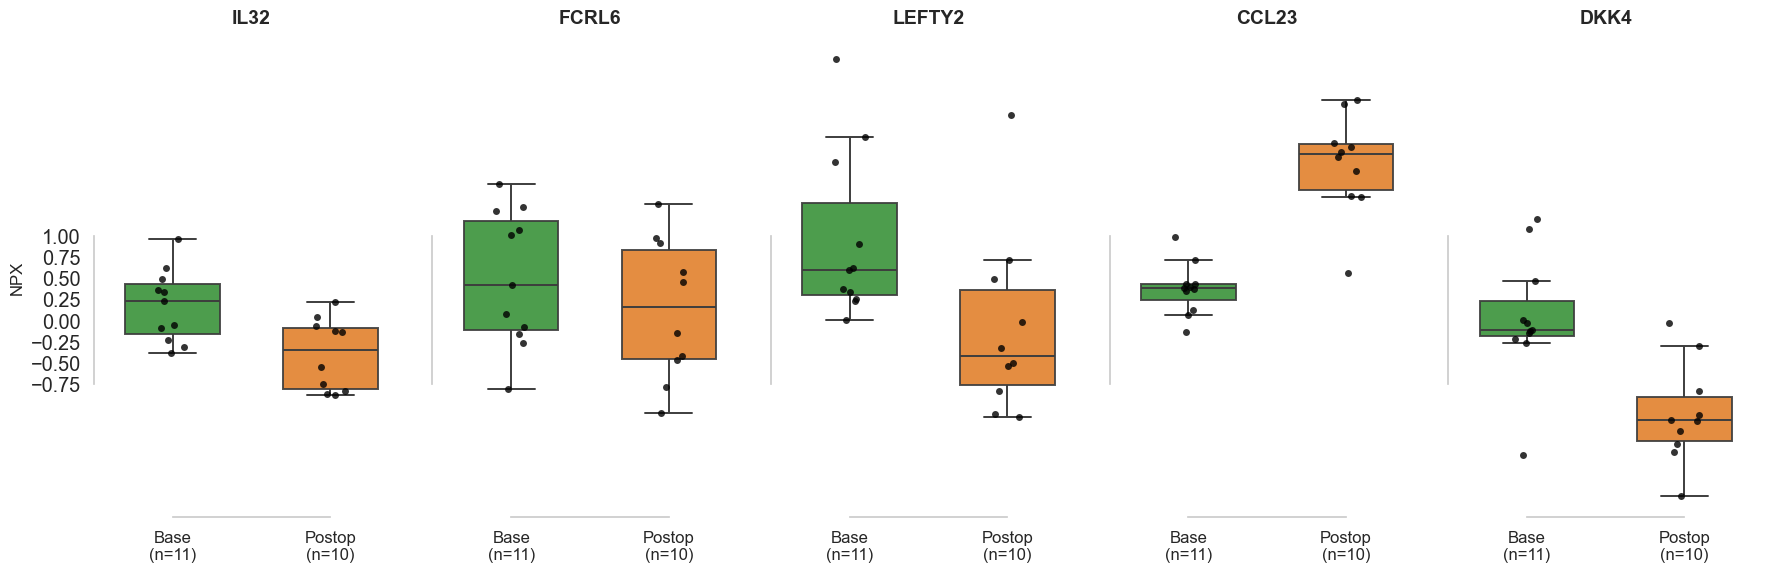

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Load dataset
# -----------------------------
df3 = pd.read_csv("NPXpp_with_timecode.csv")
df3.columns = df3.columns.str.strip()

# -----------------------------
# 2. Keep only timepoints 0 and 1
# -----------------------------
df3 = df3[df3['Timepoint'].isin([0, 1])]

# -----------------------------
# 3. Select proteins of interest
# -----------------------------
proteins = ['IL32', 'FCRL6', 'LEFTY2', 'CCL23', 'DKK4']
missing = [p for p in proteins if p not in df3.columns]
if missing:
    print(f"⚠️ Missing proteins in file: {missing}")

# -----------------------------
# 4. Create readable labels for Timepoint
# -----------------------------
label_map = {0: "Base", 1: "Postop"}
df3['Timepoint_label'] = df3['Timepoint'].map(label_map)

# Calculate group sizes (n)
group_counts = df3['Timepoint_label'].value_counts().to_dict()

# -----------------------------
# 5. Plotting style
# -----------------------------
sns.set(style='whitegrid', font_scale=1.3)
# Elegant, high-contrast color palette
palette = {"Base": "#2ca02c", "Postop": "#ff7f0e"}  # green & orange

# -----------------------------
# 6. Create figure
# -----------------------------
fig, axes = plt.subplots(1, len(proteins), figsize=(18, 6), sharey=True)

for ax, protein in zip(axes, proteins):
    plot_df = df3[['SampleID', 'Timepoint_label', protein]].copy()
    plot_df = plot_df.rename(columns={protein: 'NPX'})

    # Draw boxplot
    sns.boxplot(
        data=plot_df, x='Timepoint_label', y='NPX',
        hue='Timepoint_label', dodge=False,
        palette=palette, width=0.6, fliersize=0,
        boxprops=dict(alpha=0.9), linewidth=1.4, ax=ax,
        legend=False
    )

    # Overlay black dots (individual data points)
    sns.stripplot(
        data=plot_df, x='Timepoint_label', y='NPX',
        color='black', dodge=False,
        size=5, jitter=True, alpha=0.8, ax=ax,
        legend=False
    )

    # Axis & title styling
    ax.set_title(protein, fontsize=14, fontweight='bold', pad=10)
    ax.set_xlabel("", fontsize=12)
    if ax == axes[0]:
        ax.set_ylabel("NPX", fontsize=12)
    else:
        ax.set_ylabel("")

    # Add group labels with (n)
    new_labels = [f"{label}\n(n={group_counts[label]})" for label in plot_df['Timepoint_label'].unique()]
    ax.set_xticklabels(new_labels, fontsize=12)

    # Clean aesthetic
    sns.despine(ax=ax, trim=True)
    ax.grid(False)

plt.tight_layout()
plt.show()


C:\Users\mondalsy\AppData\Local\Temp\ipykernel_20428\2224485062.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\mondalsy\AppData\Local\Temp\ipykernel_20428\2224485062.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\mondalsy\AppData\Local\Temp\ipykernel_20428\2224485062.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\mondalsy\AppData\Local\Temp\ipykernel_20428\2224485062.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\mondalsy\AppData\Local\Temp\ipykernel_20428\2224485062.py:96: UserWarning: set_ticklabels() should only be 

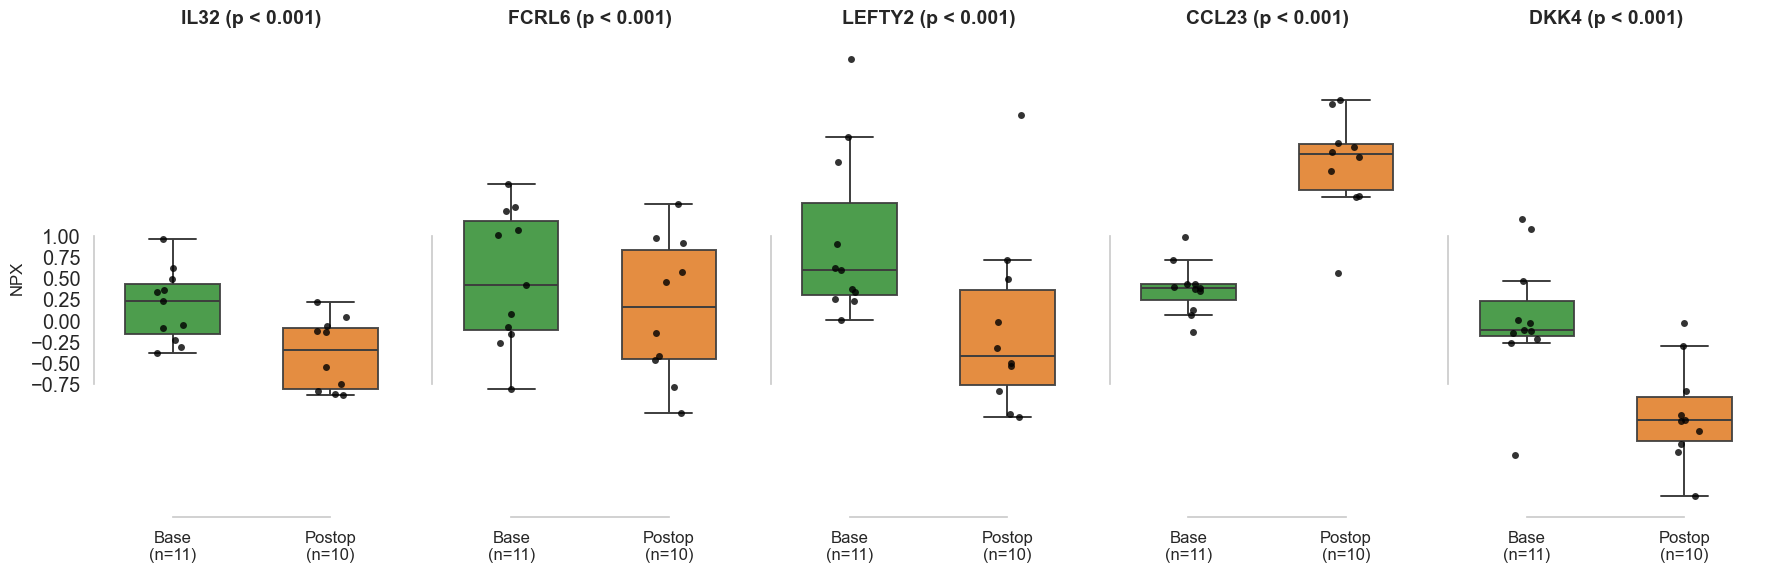

✅ Boxplots with p-values loaded from CSV generated successfully.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------
# 1. Load datasets
# ----------------------------------------
df3 = pd.read_csv("NPXpp_with_timecode.csv")
df3.columns = df3.columns.str.strip()

# Load p-values file
pval_df = pd.read_csv("NPXpp_BaseD1significant.csv")
pval_df.columns = pval_df.columns.str.strip()

# Ensure the p-value column exists
# Expected structure: Protein | p_value
if "Protein" not in pval_df.columns:
    raise ValueError("ERROR: 'Protein' column not found in p-value file")

if "p_value" not in pval_df.columns:
    raise ValueError("ERROR: 'p_value' column not found in p-value file")

# Make dictionary: { 'IL32': 0.034, 'FCRL6': 0.0002, ... }
pval_dict = dict(zip(pval_df["Protein"], pval_df["p_value"]))

# ----------------------------------------
# 2. Filter timepoints
# ----------------------------------------
df3 = df3[df3["Timepoint"].isin([0, 1])]

# ----------------------------------------
# 3. Selected proteins
# ----------------------------------------
proteins = ['IL32', 'FCRL6', 'LEFTY2', 'CCL23', 'DKK4']

# ----------------------------------------
# 4. Label timepoints
# ----------------------------------------
label_map = {0: "Base", 1: "Postop"}
df3["Timepoint_label"] = df3["Timepoint"].map(label_map)

group_counts = df3["Timepoint_label"].value_counts().to_dict()

# ----------------------------------------
# 5. Plot Style
# ----------------------------------------
sns.set(style="whitegrid", font_scale=1.3)
palette = {"Base": "#2ca02c", "Postop": "#ff7f0e"}

# ----------------------------------------
# 6. Plotting
# ----------------------------------------
fig, axes = plt.subplots(1, len(proteins), figsize=(18, 6), sharey=True)

for ax, protein in zip(axes, proteins):

    plot_df = df3[['SampleID', 'Timepoint_label', protein]].copy()
    plot_df = plot_df.rename(columns={protein: 'NPX'})

    sns.boxplot(
        data=plot_df, x="Timepoint_label", y="NPX",
        hue="Timepoint_label", dodge=False,
        palette=palette, width=0.6, fliersize=0,
        boxprops=dict(alpha=0.9), linewidth=1.4, ax=ax,
        legend=False
    )

    sns.stripplot(
        data=plot_df, x="Timepoint_label", y="NPX",
        color="black", dodge=False, size=5, jitter=True,
        alpha=0.8, ax=ax, legend=False
    )

    # ----------------------------------------
    # Read p-value from CSV dictionary
    # ----------------------------------------
    if protein in pval_dict:
        pv = pval_dict[protein]

        # Format to 0.000 style (NO scientific notation)
        if pv < 0.001:
            p_text = "(p < 0.001)"
        else:
            p_text = f"(p = {pv:.3f})"
    else:
        p_text = "(p = n/a)"

    # Title with p-value included
    ax.set_title(f"{protein} {p_text}", fontsize=14, fontweight="bold", pad=10)

    # X/Y labels
    ax.set_xlabel("")
    if ax == axes[0]:
        ax.set_ylabel("NPX", fontsize=12)

    ax.set_xticklabels(
        [f"{label}\n(n={group_counts[label]})" for label in plot_df["Timepoint_label"].unique()],
        fontsize=12
    )

    sns.despine(ax=ax, trim=True)
    ax.grid(False)

plt.tight_layout()
plt.savefig("boxplots_with_loaded_pvalues.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ Boxplots with p-values loaded from CSV generated successfully.")


In [ ]:
 pd.read_csv("NPXpp_D30Base_significant.csv")

C:\Users\mondalsy\AppData\Local\Temp\ipykernel_27024\1315822199.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\mondalsy\AppData\Local\Temp\ipykernel_27024\1315822199.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\mondalsy\AppData\Local\Temp\ipykernel_27024\1315822199.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\mondalsy\AppData\Local\Temp\ipykernel_27024\1315822199.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\mondalsy\AppData\Local\Temp\ipykernel_27024\1315822199.py:99: UserWarning: set_ticklabels() should only be 

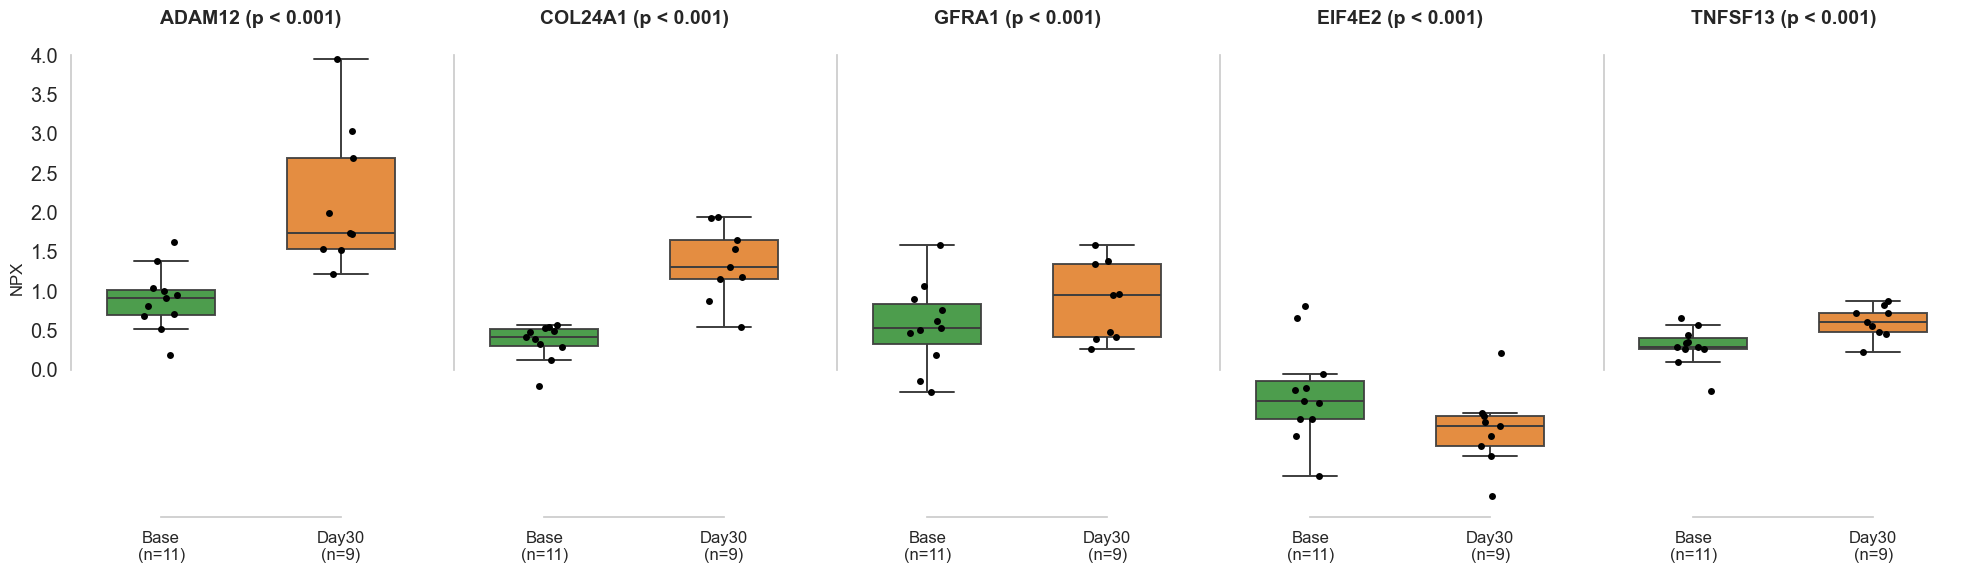

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------------------------
# 1. Load main dataset
# ----------------------------------------------------------
df3 = pd.read_csv("NPXpp_with_timecode.csv")
df3.columns = df3.columns.str.strip()

# ----------------------------------------------------------
# 2. Load p-values file
# ----------------------------------------------------------
pval_df = pd.read_csv("NPXpp_D30Base_significant.csv")
pval_df.columns = pval_df.columns.str.strip()

# Create dictionary: protein → p-value
pval_dict = dict(zip(pval_df["Protein"], pval_df["p_value"]))

# ----------------------------------------------------------
# 3. Prepare timepoint labels
# ----------------------------------------------------------
label_map = {0: "Base", 2: "Day30"}
df3["Timepoint_label"] = df3["Timepoint"].map(label_map)
df3 = df3.dropna(subset=["Timepoint_label"])
# Count n for each group
group_counts = df3["Timepoint_label"].value_counts().to_dict()

# ----------------------------------------------------------
# 4. Select proteins to plot
# ----------------------------------------------------------
proteins = ['ADAM12', 'COL24A1', 'GFRA1', 'EIF4E2', 'TNFSF13']

# ----------------------------------------------------------
# 5. Plot settings
# ----------------------------------------------------------
sns.set(style="whitegrid", font_scale=1.3)
palette = {"Base": "#2ca02c", "Day30": "#ff7f0e"}  # green + orange

fig, axes = plt.subplots(1, len(proteins), figsize=(20, 6), sharey=True)

# ----------------------------------------------------------
# 6. Loop through proteins and plot
# ----------------------------------------------------------
for ax, protein in zip(axes, proteins):

    plot_df = df3[["SampleID", "Timepoint_label", protein]].copy()
    plot_df = plot_df.rename(columns={protein: "NPX"})

    # -------- BOX PLOT --------
    sns.boxplot(
        data=plot_df,
        x="Timepoint_label",
        y="NPX",
        hue="Timepoint_label",
        dodge=False,
        palette=palette,
        width=0.6,
        fliersize=0,
        boxprops=dict(alpha=0.9),
        linewidth=1.4,
        ax=ax,
        legend=False
    )

    # -------- BLACK DOTS (individual samples) --------
    sns.stripplot(
        data=plot_df,
        x="Timepoint_label",
        y="NPX",
        color="black",
        size=5,
        jitter=True,
        ax=ax
    )

    # -------- FORMAT p-value from external file --------
    if protein in pval_dict:
        pval = pval_dict[protein]

        if pval < 0.001:
            p_text = "(p < 0.001)"
        else:
            p_text = f"(p = {pval:.3f})"
    else:
        p_text = "(p = NA)"

    # -------- TITLE: Protein + p-value --------
    ax.set_title(f"{protein} {p_text}", fontsize=14, fontweight="bold", pad=10)

    # -------- X and Y Labels --------
    ax.set_xlabel("")
    if ax == axes[0]:
        ax.set_ylabel("NPX", fontsize=12)
    else:
        ax.set_ylabel("")

    # -------- Add (n= ) under each x label --------
    ax.set_xticklabels(
        [f"{label}\n(n={group_counts[label]})" for label in plot_df["Timepoint_label"].unique()],
        fontsize=12
    )

    sns.despine(ax=ax, trim=True)
    ax.grid(False)

plt.tight_layout()
plt.savefig("boxplots_with_loaded_pvalues.png", dpi=300, bbox_inches="tight")
plt.show()


C:\Users\mondalsy\AppData\Local\Temp\ipykernel_23608\660724653.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, fontsize=12)
C:\Users\mondalsy\AppData\Local\Temp\ipykernel_23608\660724653.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, fontsize=12)
C:\Users\mondalsy\AppData\Local\Temp\ipykernel_23608\660724653.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, fontsize=12)
C:\Users\mondalsy\AppData\Local\Temp\ipykernel_23608\660724653.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, fontsize=12)
C:\Users\mondalsy\AppDat

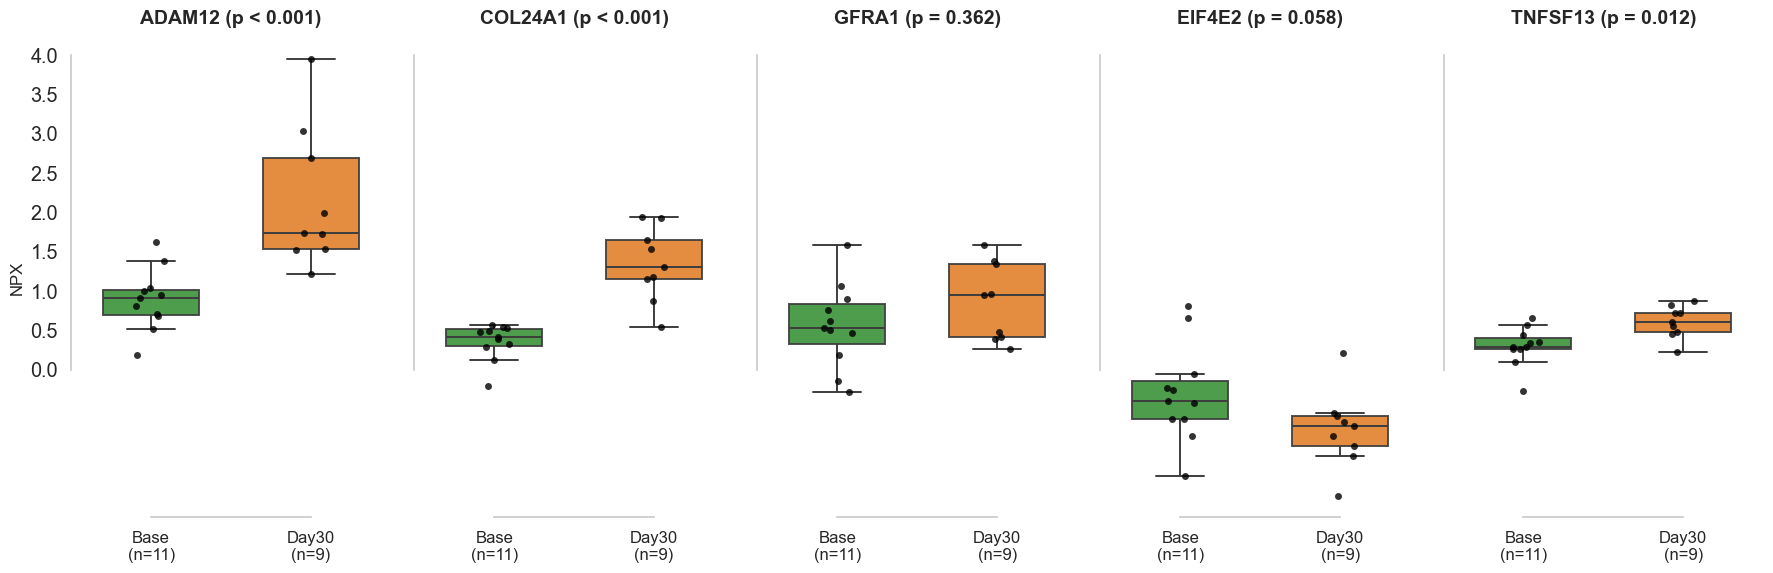

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Load dataset
# -----------------------------
df3 = pd.read_csv("NPXpp_with_timecode.csv")
df3.columns = df3.columns.str.strip()

# -----------------------------
# 2. Keep only timepoints 0 and 2
# -----------------------------
df3 = df3[df3['Timepoint'].isin([0, 2])]

# -----------------------------
# 3. Select proteins of interest
# -----------------------------
proteins = ['ADAM12', 'COL24A1','GFRA1', 'EIF4E2', 'TNFSF13']
missing = [p for p in proteins if p not in df3.columns]
if missing:
    print(f"⚠️ Missing proteins in file: {missing}")

# -----------------------------
# 4. Create readable labels for Timepoint
# -----------------------------
label_map = {0: "Base", 2: "Day30"}
df3['Timepoint_label'] = df3['Timepoint'].map(label_map)

# Calculate group sizes (n)
group_counts = df3['Timepoint_label'].value_counts().to_dict()

# -----------------------------
# 5. Plotting style
# -----------------------------
sns.set(style='whitegrid', font_scale=1.3)
# Elegant, high-contrast color palette
palette = {"Base": "#2ca02c", "Day30": "#ff7f0e"}  # green & orange

# -----------------------------
# 6. Create figure
# -----------------------------
fig, axes = plt.subplots(1, len(proteins), figsize=(18, 6), sharey=True)

for ax, protein in zip(axes, proteins):
    plot_df = df3[['SampleID', 'Timepoint_label', protein]].copy()
    plot_df = plot_df.rename(columns={protein: 'NPX'})

    # Draw boxplot
    sns.boxplot(
        data=plot_df, x='Timepoint_label', y='NPX',
        hue='Timepoint_label', dodge=False,
        palette=palette, width=0.6, fliersize=0,
        boxprops=dict(alpha=0.9), linewidth=1.4, ax=ax,
        legend=False
    )

    # Overlay black dots (individual data points)
    sns.stripplot(
        data=plot_df, x='Timepoint_label', y='NPX',
        color='black', dodge=False,
        size=5, jitter=True, alpha=0.8, ax=ax,
        legend=False
    )


    base_vals = plot_df.loc[plot_df['Timepoint_label'] == "Base", 'NPX'].dropna()
    postop_vals = plot_df.loc[plot_df['Timepoint_label'] == "Day30", 'NPX'].dropna()
    
    if len(base_vals) > 1 and len(postop_vals) > 1:
        stat, pval = mannwhitneyu(base_vals, postop_vals, alternative='two-sided')
        if pval < 0.001:
            p_text = "(p < 0.001)"
        else:
            p_text = f"(p = {pval:.3f})"
    else:
        p_text = "(n/a)"
    
    # ✅ Protein name + p-value together in title
    ax.set_title(f"{protein} {p_text}", fontsize=14, fontweight='bold', pad=10)

    
    # Axis & title styling
    #ax.set_title(protein, fontsize=14, fontweight='bold', pad=10)
    ax.set_xlabel("", fontsize=12)
    if ax == axes[0]:
        ax.set_ylabel("NPX", fontsize=12)
    else:
        ax.set_ylabel("")

    # Add group labels with (n)
    new_labels = [f"{label}\n(n={group_counts[label]})" for label in plot_df['Timepoint_label'].unique()]
    ax.set_xticklabels(new_labels, fontsize=12)

    # Clean aesthetic
    sns.despine(ax=ax, trim=True)
    ax.grid(False)

plt.tight_layout()
plt.show()


In [ ]:
ANNOVA

✅ Total proteins detected for ANOVA: 1034

📁 ANOVA results saved to 'anova_results_all_proteins.csv'
  Protein    F-stat   p-value  Significant
0  ABI3BP  6.838143  0.003956         True
1    ABL1  0.635316  0.537504        False
2   ACAA1  1.516698  0.237548        False
3    ACAN  7.847766  0.002057         True
4    ACE2  2.164941  0.134266        False
✅ Found 223 significant proteins (p < 0.05)


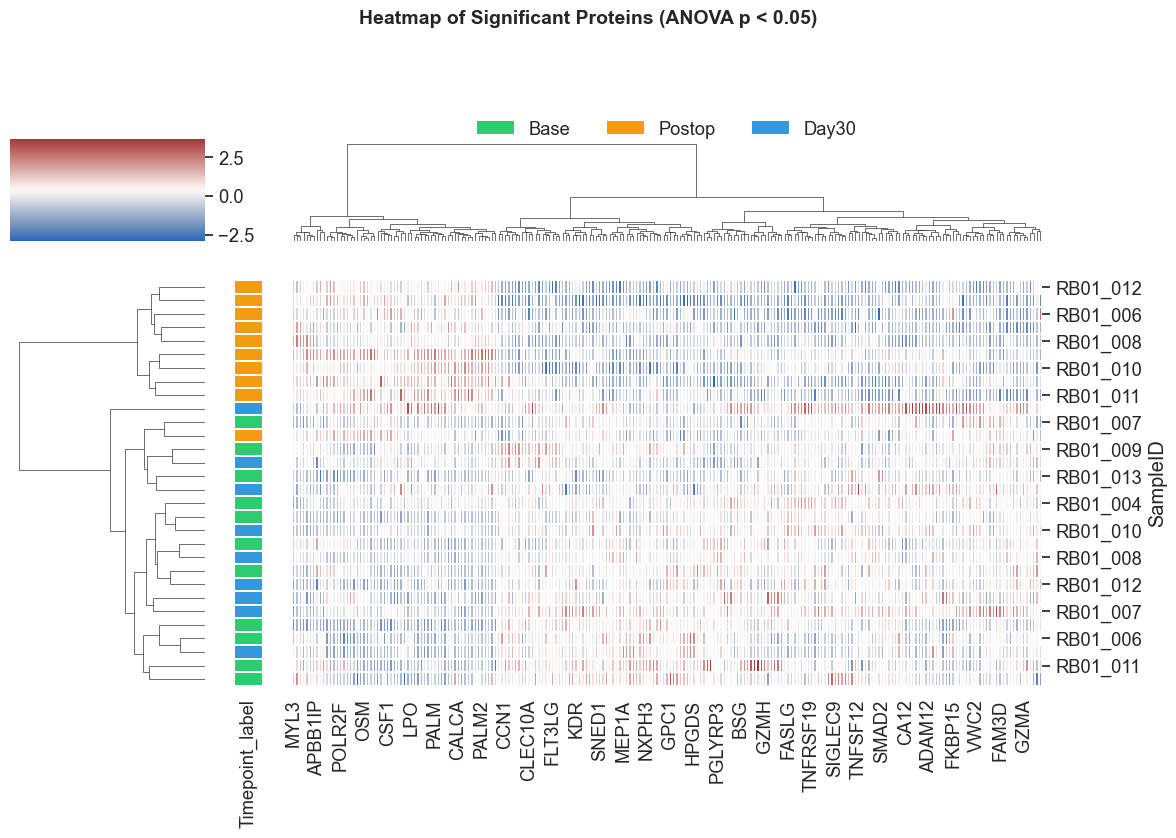


✅ ANOVA heatmap created and saved as:
   → anova_significant_heatmap.png
   → anova_significant_heatmap.pdf


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# -----------------------------
# 1. Load dataset
# -----------------------------
df_annova = pd.read_csv("NPXpp_with_timecode.csv")
df_annova.columns = df_annova.columns.str.strip()

# -----------------------------
# 2. Keep valid timepoints and map labels
# -----------------------------
df_annova = df_annova[df_annova['Timepoint'].isin([0, 1, 2, '0', '1', '2', 'Base', 'Postop', 'Day30'])].copy()

label_map = {
    0: "Base", 1: "Postop", 2: "Day30",
    "0": "Base", "1": "Postop", "2": "Day30"
}
df_annova['Timepoint_label'] = df_annova['Timepoint'].map(label_map)

# Identify protein columns
meta_cols = ['SampleID', 'Timepoint', 'Timepoint_label']
proteins = [c for c in df_annova.columns if c not in meta_cols]
print(f"✅ Total proteins detected for ANOVA: {len(proteins)}")

# -----------------------------
# 3. Run ANOVA for all proteins
# -----------------------------
anova_results = []
for protein in proteins:
    groups = [df_annova.loc[df_annova['Timepoint_label'] == label, protein].dropna()
              for label in ["Base", "Postop", "Day30"]]
    if all(len(g) > 1 for g in groups):
        f_stat, p_val = f_oneway(*groups)
        anova_results.append({'Protein': protein, 'F-stat': f_stat, 'p-value': p_val})
    else:
        anova_results.append({'Protein': protein, 'F-stat': None, 'p-value': None})

anova_df = pd.DataFrame(anova_results)
anova_df['Significant'] = anova_df['p-value'] < 0.05

anova_df.to_csv("anova_results_all_proteins.csv", index=False)
print("\n📁 ANOVA results saved to 'anova_results_all_proteins.csv'")
print(anova_df.head())

# -----------------------------
# 4. Filter significant proteins
# -----------------------------
sig_proteins = anova_df.loc[anova_df['Significant'], 'Protein'].tolist()
if not sig_proteins:
    print("⚠️ No significant proteins found (p < 0.05). Showing top 20 smallest p-values instead.")
    sig_proteins = anova_df.nsmallest(20, 'p-value')['Protein'].tolist()
else:
    print(f"✅ Found {len(sig_proteins)} significant proteins (p < 0.05)")

# -----------------------------
# 5. Prepare heatmap data
# -----------------------------
heatmap_df = df_annova[['SampleID', 'Timepoint_label'] + sig_proteins].set_index('SampleID')
# Standardize values (z-score) for better visualization
heatmap_z = heatmap_df[sig_proteins].apply(lambda x: (x - x.mean()) / x.std(), axis=0)

# Define color palette for timepoints
time_palette = {"Base": "#2ecc71", "Postop": "#f39c12", "Day30": "#3498db"}
row_colors = heatmap_df['Timepoint_label'].map(time_palette)

# -----------------------------
# 6. Create clustered heatmap
# -----------------------------
sns.set(style="white", font_scale=1.2)
g = sns.clustermap(
    heatmap_z,
    cmap="vlag",              # diverging color palette
    row_colors=row_colors,    # color code timepoints
    metric="euclidean",
    method="ward",
    figsize=(12, 8),
    linewidths=0.3
)

# Legend for timepoints
for label, color in time_palette.items():
    g.ax_col_dendrogram.bar(0, 0, color=color, label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=3, bbox_to_anchor=(0.5, 1.1), frameon=False)

plt.suptitle("Heatmap of Significant Proteins (ANOVA p < 0.05)", fontsize=14, fontweight="bold", y=1.05)
plt.tight_layout()

# -----------------------------
# 7. Save heatmap
# -----------------------------
plt.savefig("anova_significant_heatmap.png", dpi=300, bbox_inches="tight")


plt.show(block=True)
print("\n✅ ANOVA heatmap created and saved as:")
print("   → anova_significant_heatmap.png")



In [31]:
len(sig_proteins)
#print(anova_df.head())



223

✅ Selected top 15 proteins for heatmap


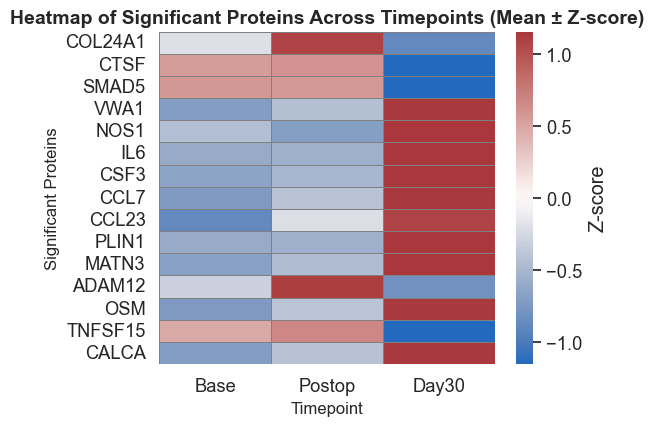


✅ Heatmap saved as PNG + PDF


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# -----------------------------
# 1. Load dataset
# -----------------------------
df_annova = pd.read_csv("NPXpp_with_timecode.csv")
df_annova.columns = df_annova.columns.str.strip()

# -----------------------------
# 2. Keep valid timepoints and map labels
# -----------------------------
df_annova = df_annova[df_annova['Timepoint'].isin([0, 1, 2, '0', '1', '2', 'Base', 'Postop', 'Day30'])].copy()
label_map = {0: "Base", 1: "Postop", 2: "Day30", "0": "Base", "1": "Postop", "2": "Day30"}
df_annova['Timepoint_label'] = df_annova['Timepoint'].map(label_map)

# Identify protein columns
meta_cols = ['SampleID', 'Timepoint', 'Timepoint_label']
proteins = [c for c in df_annova.columns if c not in meta_cols]

# -----------------------------
# 3. Run ANOVA for all proteins
# -----------------------------
anova_results = []
for protein in proteins:
    groups = [df_annova.loc[df_annova['Timepoint_label'] == label, protein].dropna()
              for label in ["Base", "Postop", "Day30"]]
    if all(len(g) > 1 for g in groups):
        f_stat, p_val = f_oneway(*groups)
        anova_results.append({'Protein': protein, 'F-stat': f_stat, 'p-value': p_val})
    else:
        anova_results.append({'Protein': protein, 'F-stat': None, 'p-value': None})

anova_df = pd.DataFrame(anova_results)
anova_df['Significant'] = anova_df['p-value'] < 0.05

# -----------------------------
# 4. Filter significant proteins
# -----------------------------
# 4. Filter top 15 significant proteins
# -----------------------------
# Sort by p-value ascending
anova_df_sorted = anova_df.sort_values('p-value')

# Take top 15 significant proteins
top_n = 15
sig_proteins = anova_df_sorted['Protein'].head(top_n).tolist()
print(f"✅ Selected top {top_n} proteins for heatmap")


# -----------------------------
# 5. Prepare heatmap: mean across samples for each timepoint
# -----------------------------
heatmap_data = df_annova.groupby('Timepoint_label')[sig_proteins].mean().T  # rows=proteins, cols=timepoints

# Optional: standardize by protein (z-score)
heatmap_data_z = heatmap_data.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

# -----------------------------
# 6. Plot heatmap
# -----------------------------
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(6, max(4, 0.3 * len(sig_proteins))))

# Diverging colormap
sns.heatmap(
    heatmap_data_z,
    cmap="vlag",          # blue-white-red
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={'label': 'Z-score'},
    yticklabels=True,
    xticklabels=["Base", "Postop", "Day30"]
)
plt.xlabel("Timepoint", fontsize=12)
plt.ylabel("Significant Proteins", fontsize=12)
plt.title("Heatmap of Significant Proteins Across Timepoints (Mean ± Z-score)", fontsize=14, fontweight="bold")
plt.tight_layout()

# -----------------------------
# 7. Save figure
# -----------------------------
plt.savefig("anova_significant_heatmap_by_timepoint.png", dpi=300, bbox_inches="tight")
plt.show(block=True)

print("\n✅ Heatmap saved as PNG + PDF")


Final proteins used for correlation:
['COL24A1', 'CTSF', 'SMAD5', 'VWA1', 'NOS1', 'IL6', 'CSF3', 'CCL7', 'CCL23', 'PLIN1', 'MATN3', 'ADAM12', 'OSM', 'TNFSF15', 'CALCA']


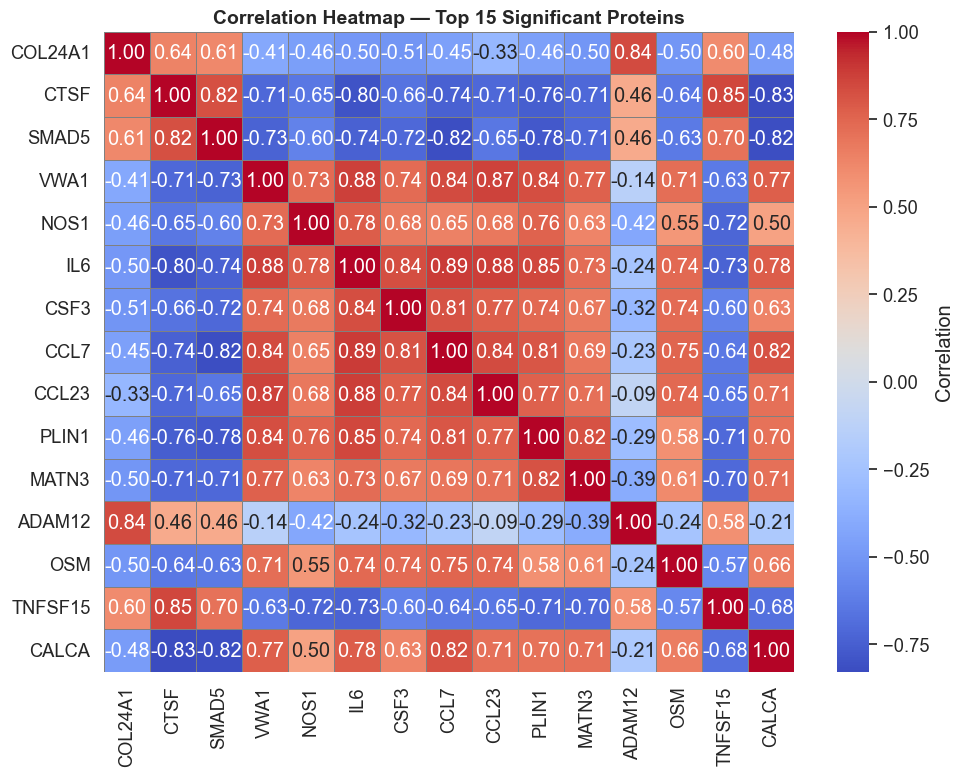

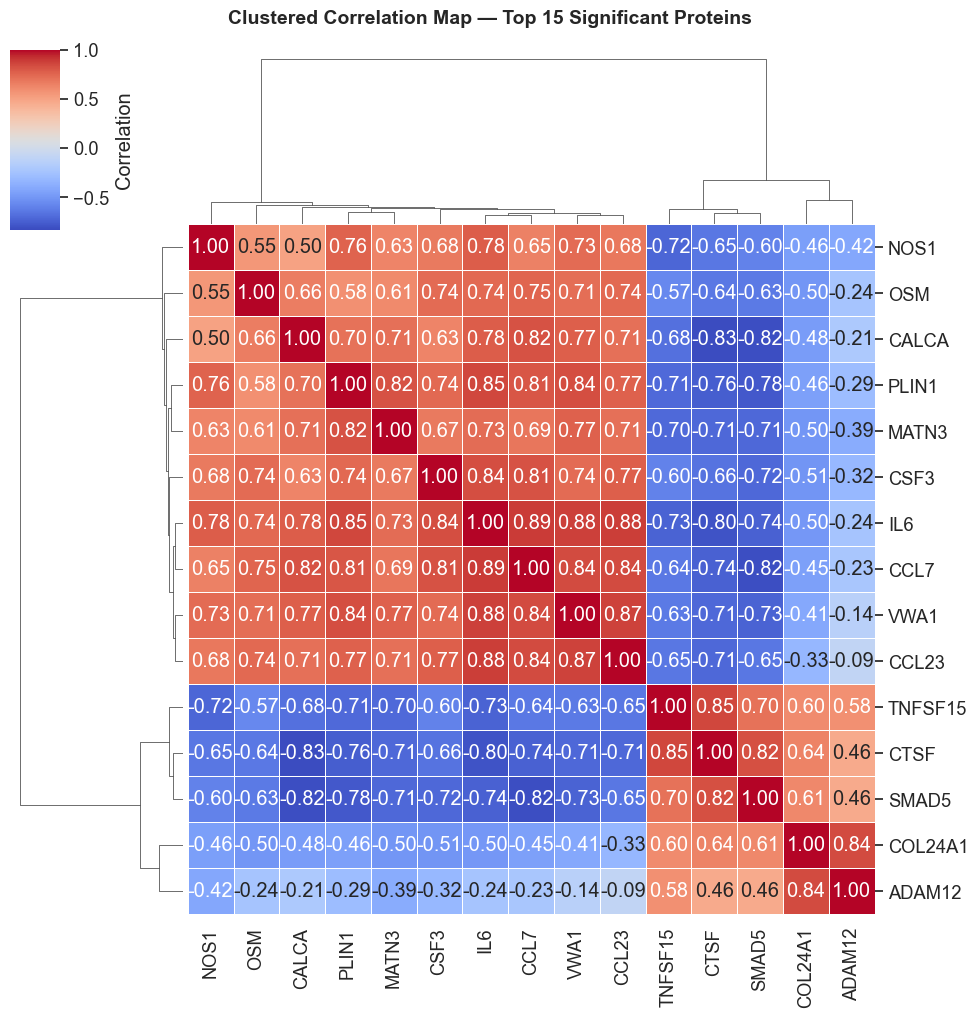

In [2]:
# ==========================================================
# STEP A — Extract data for top 15 significant proteins
# ==========================================================
corr_df = df_annova[sig_proteins].copy()

# Remove non-numeric or constant columns
corr_df = corr_df.apply(pd.to_numeric, errors='coerce')
corr_df = corr_df.dropna(axis=1, how='all')
corr_df = corr_df.loc[:, corr_df.std() > 0]  # remove zero-variance

print("Final proteins used for correlation:")
print(corr_df.columns.tolist())

# ==========================================================
# STEP B — Compute correlation matrix
# ==========================================================
corr_matrix = corr_df.corr(method='pearson')

# ==========================================================
# STEP C — Plot correlation heatmap
# ==========================================================
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation Heatmap — Top 15 Significant Proteins", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ==========================================================
# STEP D — Clustered correlation heatmap (more informative)
# ==========================================================
sns.clustermap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    figsize=(10, 10),
    cbar_kws={'label': 'Correlation'}
)
plt.suptitle("Clustered Correlation Map — Top 15 Significant Proteins", y=1.02, fontsize=14, fontweight='bold')
plt.show()


In [ ]:
pd.read_csv("NPXpp_with_timecode.csv")
anova_results_all_proteins.csv

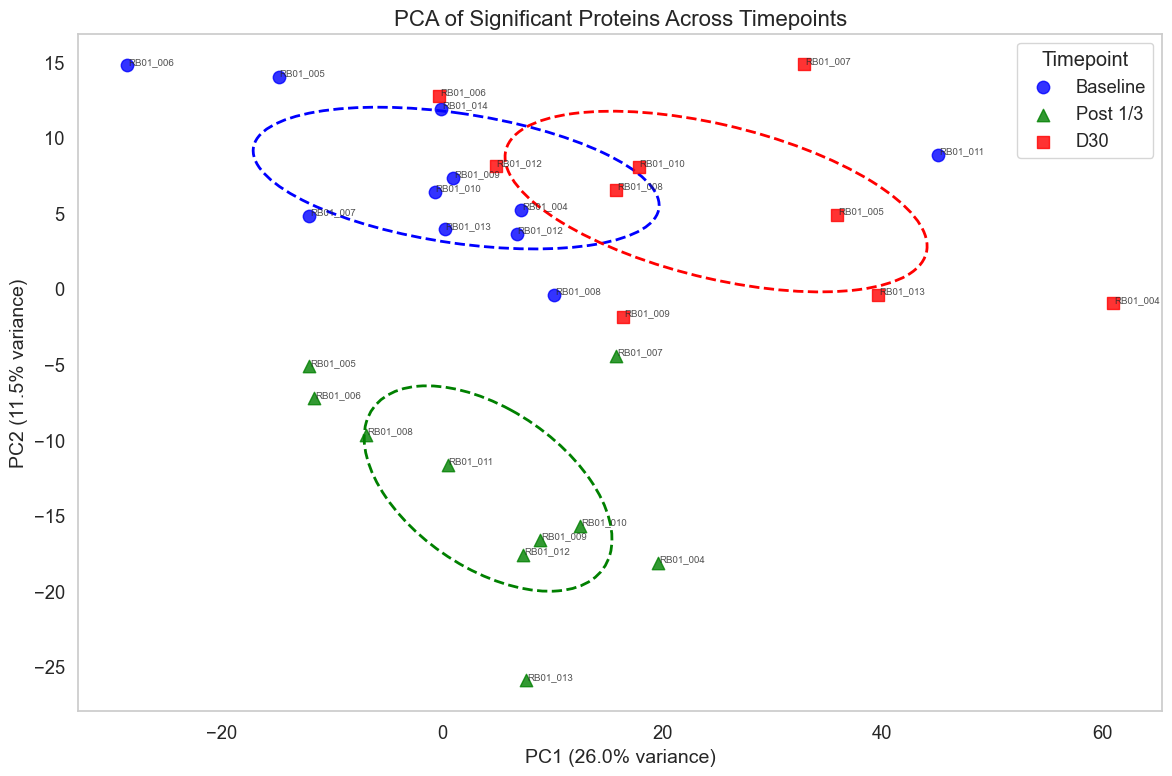

✅ PCA completed and figure saved.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

# -----------------------------
# 1. Load data
# -----------------------------
df = pd.read_csv("NPXpp_with_timecode.csv")
df.columns = df.columns.str.strip()
df['Timepoint'] = df['Timepoint'].astype(int)

# Load significant proteins from ANOVA
anova_results = pd.read_csv("anova_results_all_proteins.csv")
sig_proteins = anova_results['Protein'].tolist()  
# take all proteins or filter top N if needed

# -----------------------------
# 2. Select features for PCA
# -----------------------------
feature_cols = [c for c in sig_proteins if c in df.columns]
X = df[feature_cols]

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# -----------------------------
# 3. PCA
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

expl_var = pca.explained_variance_ratio_ * 100

# Optional: numeric spacing by timepoint
time_offsets = {0: 0, 1: 10, 2: 20}
df['PC1_shifted'] = df['PC1'] + df['Timepoint'].map(time_offsets)

# -----------------------------
# 4. Plot PCA
# -----------------------------
colors = {0: 'blue', 1: 'green', 2: 'red'}
markers = {0: 'o', 1: '^', 2: 's'}
labels = {0: 'Baseline', 1: 'Post 1/3', 2: 'D30'}

plt.figure(figsize=(12, 8))

for t in sorted(df['Timepoint'].unique()):
    subset = df[df['Timepoint'] == t]
    
    # Scatter points
    plt.scatter(subset['PC1_shifted'], subset['PC2'],
                color=colors[t], marker=markers[t], s=80,
                alpha=0.8, label=labels[t])
    
    # Draw 1 std ellipse
    cov = np.cov(subset[['PC1_shifted', 'PC2']].T)
    mean = subset[['PC1_shifted', 'PC2']].mean().values
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * np.sqrt(eigvals)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor=colors[t], fc='none', lw=2, ls='--')
    plt.gca().add_patch(ellipse)

# Annotate sample IDs
for _, row in df.iterrows():
    plt.text(row['PC1_shifted'] + 0.1, row['PC2'] + 0.1, row['SampleID'],
             fontsize=7, alpha=0.8)

plt.xlabel(f'PC1 ({expl_var[0]:.1f}% variance)', fontsize=14)
plt.ylabel(f'PC2 ({expl_var[1]:.1f}% variance)', fontsize=14)
plt.title('PCA of Significant Proteins Across Timepoints', fontsize=16)
plt.legend(title="Timepoint")
plt.grid(False)
plt.tight_layout()

# -----------------------------
# 5. Save figure
# -----------------------------
#plt.savefig("PCA_significant_proteins.png", dpi=300, bbox_inches="tight")

plt.show()

print("✅ PCA completed and figure saved.")


In [2]:
sig_proteins

['COL24A1',
 'CTSF',
 'SMAD5',
 'VWA1',
 'NOS1',
 'IL6',
 'CSF3',
 'CCL7',
 'CCL23',
 'PLIN1',
 'MATN3',
 'ADAM12',
 'OSM',
 'TNFSF15',
 'CALCA']

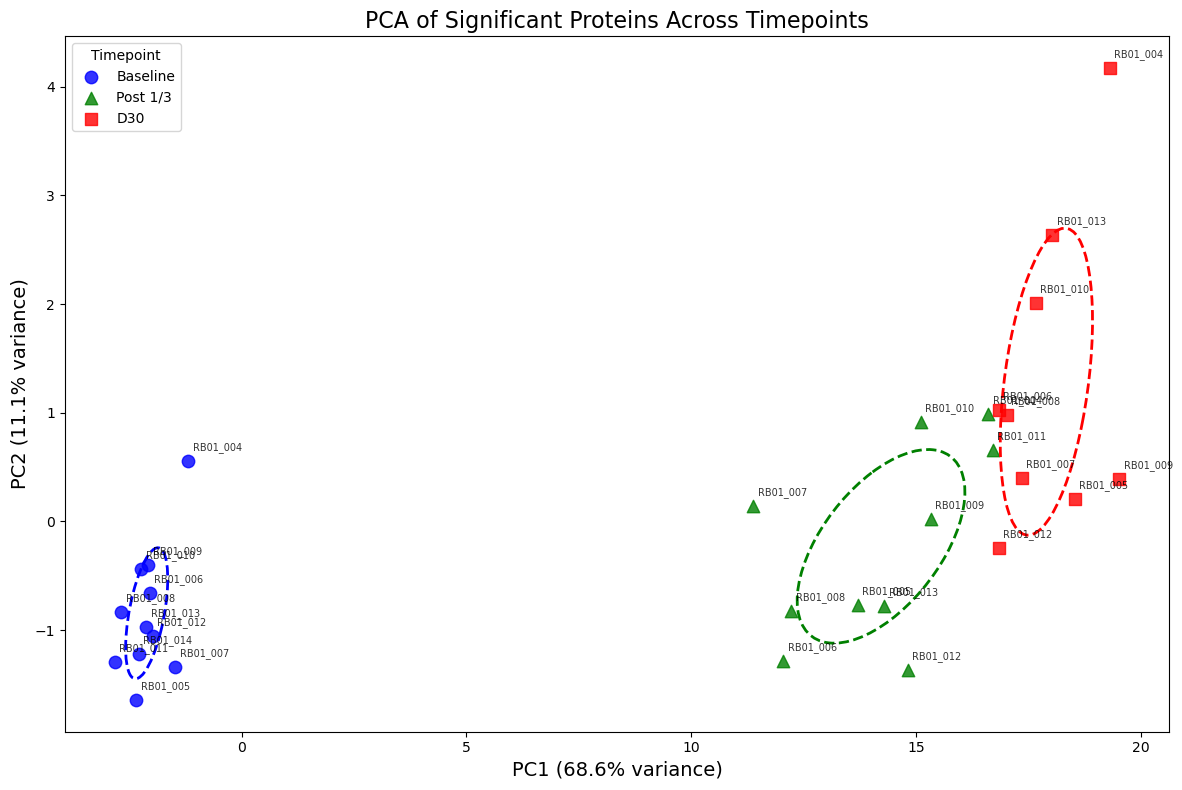

✅ PCA completed and figure saved.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

# -----------------------------
# 1. Load data
# -----------------------------
df = pd.read_csv("NPXpp_with_timecode.csv")
df.columns = df.columns.str.strip()
df['Timepoint'] = df['Timepoint'].astype(int)

# Load significant proteins from ANOVA
#sig_proteins = sig_proteins
sig_proteins = ['COL24A1',
 'CTSF',
 'SMAD5',
 'VWA1',
 'NOS1',
 'IL6',
 'CSF3',
 'CCL7',
 'CCL23',
 'PLIN1',
 'MATN3',
 'ADAM12',
 'OSM',
 'TNFSF15',
 'CALCA']
# take all proteins or filter top N if needed

# -----------------------------
# 2. Select features for PCA
# -----------------------------
feature_cols = [c for c in sig_proteins if c in df.columns]
X = df[feature_cols]

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# -----------------------------
# 3. PCA
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

expl_var = pca.explained_variance_ratio_ * 100

# Optional: numeric spacing by timepoint
time_offsets = {0: 0, 1: 10, 2: 20}
df['PC1_shifted'] = df['PC1'] + df['Timepoint'].map(time_offsets)

# -----------------------------
# 4. Plot PCA
# -----------------------------
colors = {0: 'blue', 1: 'green', 2: 'red'}
markers = {0: 'o', 1: '^', 2: 's'}
labels = {0: 'Baseline', 1: 'Post 1/3', 2: 'D30'}

plt.figure(figsize=(12, 8))

for t in sorted(df['Timepoint'].unique()):
    subset = df[df['Timepoint'] == t]
    
    # Scatter points
    plt.scatter(subset['PC1_shifted'], subset['PC2'],
                color=colors[t], marker=markers[t], s=80,
                alpha=0.8, label=labels[t])
    
    # Draw 1 std ellipse
    cov = np.cov(subset[['PC1_shifted', 'PC2']].T)
    mean = subset[['PC1_shifted', 'PC2']].mean().values
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * np.sqrt(eigvals)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor=colors[t], fc='none', lw=2, ls='--')
    plt.gca().add_patch(ellipse)

# Annotate sample IDs
for _, row in df.iterrows():
    plt.text(row['PC1_shifted'] + 0.1, row['PC2'] + 0.1, row['SampleID'],
             fontsize=7, alpha=0.8)

plt.xlabel(f'PC1 ({expl_var[0]:.1f}% variance)', fontsize=14)
plt.ylabel(f'PC2 ({expl_var[1]:.1f}% variance)', fontsize=14)
plt.title('PCA of Significant Proteins Across Timepoints', fontsize=16)
plt.legend(title="Timepoint")
plt.grid(False)
plt.tight_layout()

# -----------------------------
# 5. Save figure
# -----------------------------
#plt.savefig("PCA_significant_proteins.png", dpi=300, bbox_inches="tight")

plt.show()

print("✅ PCA completed and figure saved.")


In [ ]:
# why RB01_004 is out of patterns, what happen in data ?

In [5]:
# Load your file
rawdf = pd.read_csv("NPXpp_with_timecode.csv")
print(" File read")



 File read


In [14]:
# Median Absolute Deviation (MAD) – Most Robust Test
from scipy.stats import median_abs_deviation
df= rawdf
X = df[feature_cols]   # all numeric proteins
mad = median_abs_deviation(X, axis=0, nan_policy="omit")

# Compute MAD z-score per sample
mad_z = (X - np.median(X, axis=0)) / mad
df['mad_outlier_score'] = np.nanmean(abs(mad_z), axis=1)

print(df[['SampleID','mad_outlier_score']].sort_values('mad_outlier_score', ascending=False))


    SampleID  mad_outlier_score
22  RB01_011           3.549114
2   RB01_004           3.478380
17  RB01_009           2.860548
20  RB01_010           2.818256
25  RB01_012           2.644855
28  RB01_013           2.335230
5   RB01_005           2.160001
1   RB01_004           1.576654
14  RB01_008           1.571591
8   RB01_006           1.441378
11  RB01_007           1.246259
7   RB01_006           1.145282
24  RB01_012           0.988257
27  RB01_013           0.972327
13  RB01_008           0.960133
19  RB01_010           0.931417
21  RB01_011           0.866825
18  RB01_010           0.807460
3   RB01_005           0.795041
10  RB01_007           0.786643
12  RB01_008           0.757833
9   RB01_007           0.752684
29  RB01_014           0.751849
15  RB01_009           0.741023
26  RB01_013           0.738638
4   RB01_005           0.665860
16  RB01_009           0.649738
0   RB01_004           0.606079
23  RB01_012           0.598778
6   RB01_006           0.545549


In [ ]:
RB01_004           3.478380
RB01_004           1.576654
RB01_004           0.606079 but also RB01_011

In [16]:
# Isolation Forest
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
df['iso_label'] = iso.fit_predict(X)  # -1 = outlier
df['iso_score'] = iso.decision_function(X)

print(df[['SampleID','iso_label','iso_score']].sort_values('iso_score'))


    SampleID  iso_label  iso_score
2   RB01_004         -1  -0.017222
22  RB01_011         -1  -0.010716
20  RB01_010          1   0.013097
17  RB01_009          1   0.042155
25  RB01_012          1   0.042920
1   RB01_004          1   0.047555
5   RB01_005          1   0.066907
14  RB01_008          1   0.066989
28  RB01_013          1   0.075146
11  RB01_007          1   0.082177
8   RB01_006          1   0.086814
27  RB01_013          1   0.090067
24  RB01_012          1   0.097732
7   RB01_006          1   0.102966
19  RB01_010          1   0.115074
13  RB01_008          1   0.117263
4   RB01_005          1   0.126180
3   RB01_005          1   0.135403
16  RB01_009          1   0.135637
15  RB01_009          1   0.137399
29  RB01_014          1   0.137953
26  RB01_013          1   0.138554
10  RB01_007          1   0.142474
9   RB01_007          1   0.143970
0   RB01_004          1   0.146466
12  RB01_008          1   0.147594
21  RB01_011          1   0.147766
18  RB01_010        

In [ ]:
If Sample 004 has LOF_outlier = -1, it is definitely unusual.